In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
import os
os.listdir("/content/drive/My Drive/ML and AI/Datasets") # datasets save in my google drive

['cat vs dog',
 'compresive_strength_concrete',
 'Mnist_fashion_dataset',
 'Boston Housing dataset',
 'sonar dataset',
 'Iris dataset',
 'diabetes dataset',
 'bbc dataset',
 'IMDB dataset',
 'jena_climate',
 'Amazon_Reviews']

Dr Noman Islam Video Lecture link :

https://www.youtube.com/watch?v=-neSx9_5f6w&list=PLkvOxJFQW9RHc90a0atm9Ubxi7cZcNA9C&index=24

# Advanced use of recurrent neural networks
We’ll cover the following techniques:

 Recurrent dropout—This is a specific, built-in way to use dropout to fight overfitting in recurrent layers.

 Stacking recurrent layers—This increases the representational power of the network (at the cost of higher computational loads).

 Bidirectional recurrent layers—These present the same information to a recurrent
network in different ways, increasing accuracy and mitigating forgetting issues

# Download Weather data
https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
    
Until now we did language processing (IMDB) But sequence data is found in many more problems.

jena_climate is a dataset,that were recorded every 10 minutes 2009–2016 in this case.

In [9]:
# This cell is of book code
# This can be done easily with less code
# as i did in cell below 

import os

data_dir = 'jena_climate'
fname = os.path.join(data_dir, '/content/drive/My Drive/ML and AI/Datasets/jena_climate/jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print()
print("Length of dataset :",len(lines))

# Now, convert all 420,551 lines of data into a Numpy array

import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']

Length of dataset : 420551


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/ML and AI/Datasets/jena_climate/jena_climate_2009_2016.csv")
print("Length of dataset :",len(df))
print()
display(df.head())
values = df.iloc[:,1:] # excluded date
float_data = np.asarray(values) # converting in numpy array

Length of dataset : 420551



,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [3]:
float_data

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

# Plotting the temperature timeseries
For instance, here is the plot of temperature (in degrees Celsius) over time. On this plot, you can clearly see the yearly periodicity of temperature.

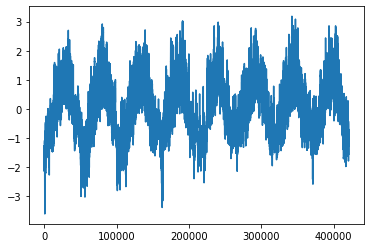

In [12]:
from matplotlib import pyplot as plt
temp = float_data[:, 1] #<1> temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)

# Plotting the first 10 days of the temperature timeseries
Here is a more narrow plot of the first 10 days of temperature data.
Because the data is recorded every 10 minutes, you get 144 data points per day.

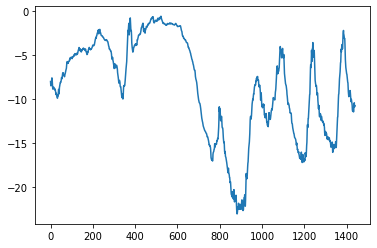

In [ ]:
plt.plot(range(1440), temp[:1440])

# Normalizing the data
We are going to use the first 200,000 timesteps as training data

In [10]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

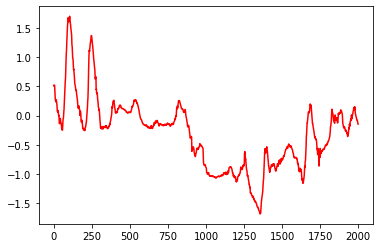

In [13]:
# PLOT ranges of float_data from VALIDATION range
import matplotlib.pyplot as plt

Ulim = 202000
Llim = 200000
SamSize = Ulim - Llim

plt.plot(range(SamSize), temp[Llim:Ulim], 'r')
#plt.plot(range(SamSize), pBar[Llim:Ulim], 'g')
#plt.plot(range(SamSize), rh[Llim:Ulim], 'b')

# Generator yielding timeseries samples and their targets
The data generator you’ll use. It yields a tuple (samples, targets),
where samples is one batch of input data and targets is the corresponding array of
target temperatures. It takes the following arguments:

data—The original array of floating-point data, which you normalized.

 lookback—How many timesteps back the input data should go.

 delay—How many timesteps in the future the target should be.

 min_index and max_index—Indices in the data array that delimit which timesteps to draw from. This is useful for keeping a segment of the data for validation and another for testing.

 shuffle—Whether to shuffle the samples or draw them in chronological order.

 batch_size—The number of samples per batch.

 step—The period, in timesteps, at which you sample data. You’ll set it to 6 in
order to draw one data point every hour.

In [14]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    if max_index is None: #If max index is not specified, we will set it to very end of the data
        max_index = len(data) - delay - 1 # 1 step peche kharehoke agay ka data pridict kara sakte hai
    i = min_index + lookback # 0 se start nahe kersakte lookback kerna hai to utna agay se stat kerna parega
    while 1:
        if shuffle: 
            #Generate random rows
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index: 
                i = min_index + lookback    # ager data khatam ho raha ho to yeah set kerdo
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows) # 
        samples = np.zeros((len(rows),lookback // step,data.shape[-1])) # past data
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets # sample pe lookback aur target mai delay ka bht sara data hai

# Preparing the training, validation, and test generators
Now, let’s use the abstract generator function to instantiate three generators: one for
training, one for validation, and one for testing. Each will look at different temporal
segments of the original data:

the training generator looks at the first 200,000 timesteps,

the validation generator looks at the following 100,000,and

the test generator looks at the remainder.

In [15]:
lookback = 1440   # 1440/6 = 240(samples) kitna past data dekhna hai
step = 6          # 10 min bt ka data hai, 6 step matlab 60 min(1 hour) ke bt ka data lo
delay = 144
batch_size = 128  # kitne line uthane hai

train_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=0,
                        max_index=200000,
                        shuffle=True,
                        step=step,
                        batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size # in book code batch size was not divided
# How many steps to draw from val_gen in order to see the entire validation set

test_steps = (len(float_data) - 300001 - lookback) // batch_size # in book code batch size was not divided
# How many steps to draw from test_gen in order to see the entire test set 

In [ ]:
################# Data is ready ######################

#A common-sense, non-machine-learning baseline
Before you start using black-box deep-learning models to solve the temperature-
prediction problem, let’s try a simple, common-sense approach.

In [ ]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        #print(samples.shape)
        #print(targets.shape)
        preds = samples[:,-1,1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()

0.28973597299054815


This yields an MAE of 0.29. Because the temperature data has been normalized to be
centered on 0 and have a standard deviation of 1, this number isn’t immediately inter-
pretable. It translates to an average absolute error of 0.29 × temperature_std degrees
Celsius: 2.57 ̊C.

In [ ]:
celsius_mae = 0.3 * std[1]
celsius_mae

2.65574972466139

You use MAE as the loss.
Because you evaluate on the exact same data and with the exact same metric you did
with the common-sense approach, the results will be directly comparable.

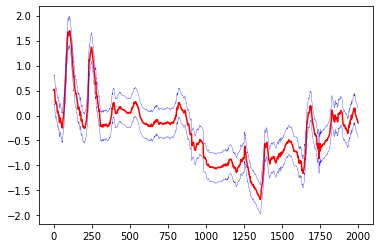

In [16]:
maeC = 0.28974
Ulim = 202000
Llim = 200000
SampleSize = Ulim - Llim

plt.plot(range(SampleSize), temp[Llim:Ulim], 'r')
plt.plot(range(SampleSize), temp[Llim:Ulim]+maeC, 'b', linewidth=0.3)
plt.plot(range(SampleSize), temp[Llim:Ulim]-maeC, 'b', linewidth=0.3)

# A basic machine-learning approach

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Flatten(input_shape=(lookback//step,float_data.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=RMSprop(),loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3360)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                107552    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500, #500
                              epochs=20,           #20
                              validation_data=val_gen,
                              validation_steps=val_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
500/500 [==============================] - 11s 22ms/step - loss: 1.1411 - val_loss: 0.5559
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 0.3971 - val_loss: 0.4205
Epoch 3/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2914 - val_loss: 0.3167
Epoch 4/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2666 - val_loss: 0.3767
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2533 - val_loss: 0.3210
Epoch 6/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2432 - val_loss: 0.3190
Epoch 7/20
500/500 [==============================] - 11s 21ms/step - loss: 0.2407 - val_loss: 0.3147
Epoch 8/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2332 - val_loss: 0.3187
Epoch 9/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2286 - val_loss: 0.3101
Epoch 

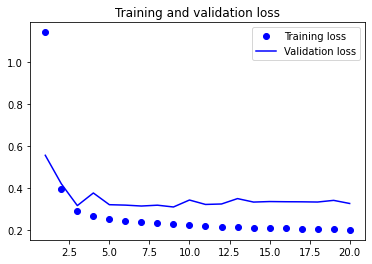

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

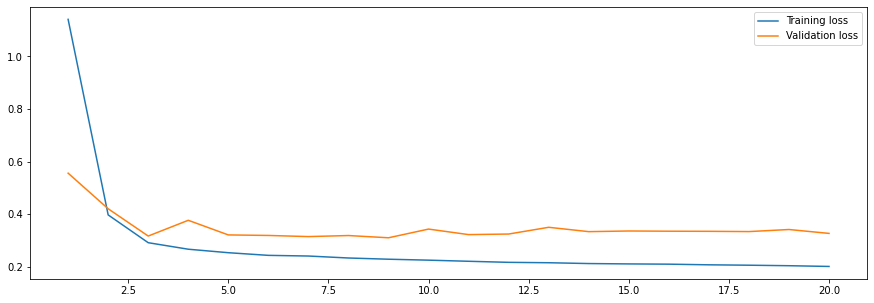

In [ ]:
import matplotlib.pyplot as plt
def show_all(history):
    def show(history,acc,val_acc,label):
        epochs = range(1, len(history.history[acc])+1)
        plt.plot(epochs,history.history[acc],label='Training '+label)
        plt.plot(epochs,history.history[val_acc],label='Validation '+label)
        plt.legend()
        
    plt.figure(figsize=(15,5))
    
    #plt.subplot(121)
    #show(history,'acc','val_acc','acc')
    #plt.subplot(122)
    show(history,'loss','val_loss','loss')
show_all(history)

Some of the validation losses are close to the no-learning baseline, but not reliably.
This goes to show the merit of having this baseline in the first place: it turns out to be
not easy to outperform. Your common sense contains a lot of valuable information
that a machine-learning model doesn’t have access to.


#Training and evaluating a GRU-based model
A first recurrent baseline

Gated recurrent unit ( GRU ) layers work
using the same principle as LSTM , but they’re somewhat streamlined and thus
cheaper to run (although they may not have as much representational power as
LSTM ).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                4608      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500, #500
                              epochs=20,           #20
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3062 - val_loss: 0.2813
Epoch 2/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2855 - val_loss: 0.2674
Epoch 3/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2789 - val_loss: 0.2664
Epoch 4/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2744 - val_loss: 0.2646
Epoch 5/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2718 - val_loss: 0.2616
Epoch 6/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2668 - val_loss: 0.2671
Epoch 7/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2636 - val_loss: 0.2626
Epoch 8/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2601 - val_loss: 0.2632
Epoch 9/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2560 - val_loss: 0.2697
Epoch 10/20
500/500 [==============================] - 15s 31ms/step - loss: 0.252

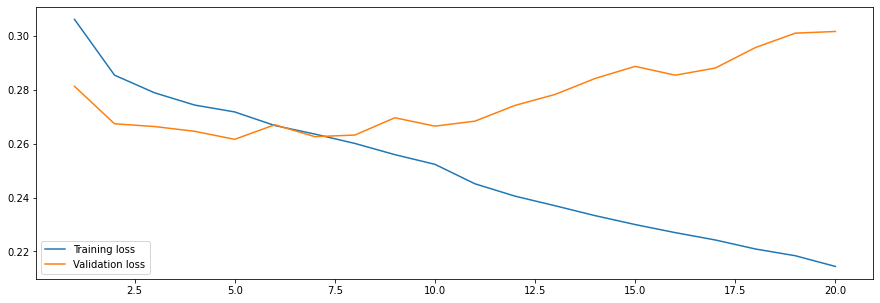

In [ ]:
show_all(history)

Much better! You can significantly beat the common-
sense baseline,compared to recurrent networks on this type
of task.

The new validation MAE of ~0.265 (before you start significantly overfitting) translates
to a mean absolute error of 2.35 ̊C after denormalization. That’s a solid gain on the
initial error of 2.57 ̊C, but you probably still have a bit of a margin for improvement.

# Using recurrent dropout to fight overfitting
It’s evident from the training and validation curves that the model is overfitting.

It has long been known that
applying dropout before a recurrent layer hinders learning rather than helping with
regularization.Thats why we will use recurrent dropout

Every recurrent layer in Keras has two dropout-related
arguments: dropout , a float specifying the dropout rate for input units of the layer,and recurrent_dropout,networks being regularized with dropout always take longer to fully con-
verge, you’ll train the network for twice as many epochs.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,dropout=0.2,recurrent_dropout=0.2,input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 32)                4608      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,       #500
                              epochs=40,                 #40
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 283s 566ms/step - loss: 75350210443677663232.0000 - val_loss: 0.7727
Epoch 2/40
500/500 [==============================] - 280s 561ms/step - loss: 55375702378829537280.0000 - val_loss: 0.7925
Epoch 3/40
500/500 [==============================] - 288s 575ms/step - loss: 53969126703340453888.0000 - val_loss: 0.7894
Epoch 4/40
500/500 [==============================] - 284s 567ms/step - loss: 51714189459613622272.0000 - val_loss: 0.7989
Epoch 5/40
500/500 [==============================] - 278s 556ms/step - loss: 51647098569605079040.0000 - val_loss: 0.7728
Epoch 6/40
500/500 [==============================] - 281s 561ms/step - loss: 50531826216701100032.0000 - val_loss: 0.7848
Epoch 7/40
500/500 [==============================] - 282s 563ms/step - loss: 50587466477058138112.0000 - val_loss: 0.7752
Epoch 8/40
500/500 [==============================] - 280s 560ms/step - loss: 51411917871374467072.0000 - val_loss: 0.7936
Epoch 9/40
500/5

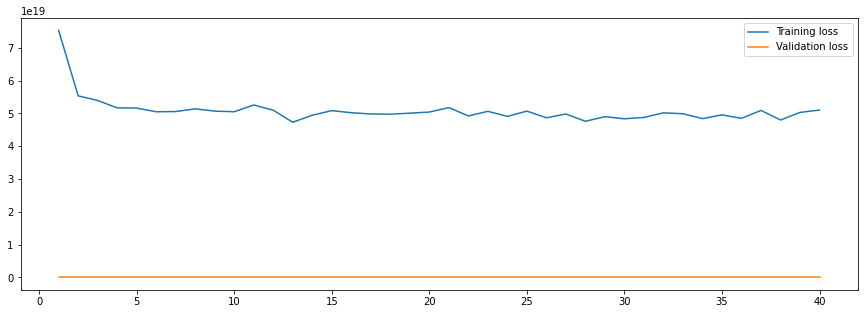

In [ ]:
show_all(history)

You’re no longer overfitting during the first 30
epochs. But although you have more stable evaluation scores, your best scores aren’t
much lower than they were previously

# Training and evaluating a dropout-regularized, stacked GRU model
Because you’re no longer overfitting but seem to have hit a performance bottleneck,
you should consider increasing the capacity of the network.

Increasing network capacity is typically done by increasing the number of units in
the layers or adding more layers. Recurrent layer stacking is a classic way to build
more-powerful recurrent networks: for instance, what currently powers the Google
Translate algorithm is a stack of seven large LSTM layers—that’s huge.

To stack recurrent layers on top of each other in Keras, all intermediate layers
should return their full sequence of outputs (a 3D tensor) rather than their output at
the last timestep.

This is done by specifying return_sequences=True

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5,return_sequences=True,input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

In [ ]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,      #500
                              epochs=40,               #40
                              validation_data=val_gen,
                              validation_steps=val_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
500/500 [==============================] - 767s 2s/step - loss: 0.3193 - val_loss: 0.2810
Epoch 2/40
500/500 [==============================] - 769s 2s/step - loss: 0.2997 - val_loss: 0.2713
Epoch 3/40
500/500 [==============================] - 775s 2s/step - loss: 0.2933 - val_loss: 0.2691
Epoch 4/40
500/500 [==============================] - 777s 2s/step - loss: 0.2845 - val_loss: 0.2766
Epoch 5/40
500/500 [==============================] - 784s 2s/step - loss: 0.2789 - val_loss: 0.2782
Epoch 6/40
500/500 [==============================] - 775s 2s/step - loss: 0.2736 - val_loss: 0.2739
Epoch 7/40
500/500 [==============================] - 776s 2s/step - loss: 0.2682 - val_loss: 0.2708
Epoch 8/40
500/500 [==============================] - 775s 2s/step - loss: 0.2622 - val_loss: 0.2737
Epoch 9/40
500/500 [==============================] - 778s 2s/step - loss: 0.2587 - val_loss: 0.2800
Epoch 10/40
500

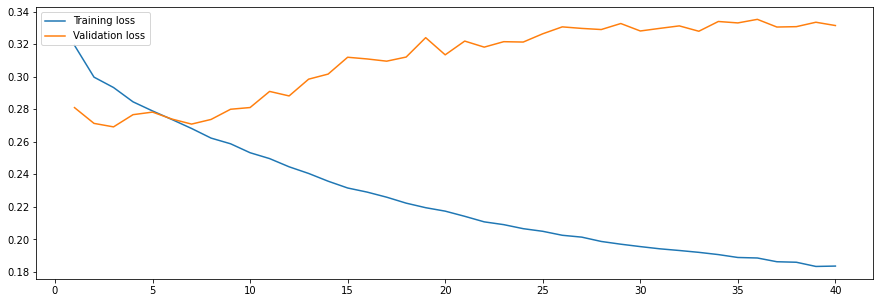

In [ ]:
import matplotlib.pyplot as plt
def show_all(history):
    def show(history,acc,val_acc,label):
        epochs = range(1, len(history.history[acc])+1)
        plt.plot(epochs,history.history[acc],label='Training '+label)
        plt.plot(epochs,history.history[val_acc],label='Validation '+label)
        plt.legend()
        
    plt.figure(figsize=(15,5))
    
    #plt.subplot(121)
    #show(history,'acc','val_acc','acc')
    #plt.subplot(122)
    show(history,'loss','val_loss','loss')
show_all(history)

In [ ]:
# Saving model
model.save('jena_climate_Stacked_Gru.h5')

You can see that the added layer does improve the
results a bit, though not significantly. You can draw two conclusions:

 Because you’re still not overfitting too badly, you could safely increase the size of
your layers in a quest for validation-loss improvement. This has a non-negligible
computational cost, though.

 Adding a layer didn’t help by a significant factor, so you may be seeing diminish-
ing returns from increasing network capacity at this point.

# Using bidirectional RNNs
All you need to
do is write a variant of the data generator where the input sequences are reverted along
the time dimension (replace the last line with yield samples[:, ::-1, :], targets ).
Training the same one- GRU -layer network that you used in the first experiment in this
section,

# Practice below is not done in Book

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    if max_index is None: #If max index is not specified, we will set it to very end of the data
        max_index = len(data) - delay - 1 # 1 step peche kharehoke agay ka data pridict kara sakte hai
    i = min_index + lookback # 0 se start nahe kersakte lookback kerna hai to utna agay se stat kerna parega
    while 1:
        if shuffle: 
            #Generate random rows
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index: 
                i = min_index + lookback    # ager data khatam ho raha ho to yeah set kerdo
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows) # 
        samples = np.zeros((len(rows),lookback // step,data.shape[-1])) # past data
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets        # only changed this line for reverce sequence
        #yield samples, targets # sample pe lookback aur target mai delay ka bht sara data hai

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1]))) # changed this layer
#model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 64)                9216      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500, #500
                              epochs=20,           #20
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 22s 44ms/step - loss: 0.2913 - val_loss: 0.2741
Epoch 2/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2748 - val_loss: 0.2658
Epoch 3/20
500/500 [==============================] - 21s 43ms/step - loss: 0.2689 - val_loss: 0.2673
Epoch 4/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2624 - val_loss: 0.2645
Epoch 5/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2571 - val_loss: 0.2682
Epoch 6/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2501 - val_loss: 0.2693
Epoch 7/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2461 - val_loss: 0.2686
Epoch 8/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2394 - val_loss: 0.2718
Epoch 9/20
500/500 [==============================] - 21s 42ms/step - loss: 0.2343 - val_loss: 0.2785
Epoch 10/20
500/500 [==============================] - 21s 43ms/step - loss: 0.227

The reversed-order GRU strongly underperforms even the common-sense baseline,
indicating that in this case, chronological processing is important to the success of your
approach. This makes perfect sense: the underlying GRU layer will typically be better at
remembering the recent past than the distant past

Importantly, this isn’t
true for many other problems, including natural language(IMDB): intuitively, the importance
of a word in understanding a sentence isn’t usually dependent on its position in the sen-
tence.

In [ ]:
######## Finish #################

# We Saved a Model Above lets try to use that for Preediction

In [ ]:
# files in current folders
ls

drive/  jena_climate_Stacked_Gru.h5  sample_data/


In [ ]:
# moving saved model in a folder
import shutil
shutil.move("jena_climate_Stacked_Gru.h5", "/content/drive/My Drive/ML and AI")

mkdir: cannot create directory ‘/content/drive/My’: Operation not supported
mkdir: cannot create directory ‘Drive/ML’: No such file or directory
mkdir: cannot create directory ‘and’: File exists
mkdir: cannot create directory ‘AI/Models’: No such file or directory
mkdir: cannot create directory ‘/content/drive/My’: Operation not supported
mkdir: cannot create directory ‘Drive/ML’: No such file or directory
mkdir: cannot create directory ‘and’: File exists
mkdir: cannot create directory ‘AI/Models/Mymodels’: No such file or directory


'/content/drive/My Drive/ML and AI/jena_climate_Stacked_Gru.h5'

In [ ]:
ls

and/  drive/  sample_data/


In [23]:
import os
os.listdir("/content/drive/My Drive/ML and AI")

['Datasets', 'pretrained word embeddings', 'jena_climate_Stacked_Gru.h5']

In [24]:
# loading data again
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/My Drive/ML and AI/Datasets/jena_climate/jena_climate_2009_2016.csv")
print("Length of dataset :",len(df))
print()
display(df.head())
values = df.iloc[:,1:] # excluded date
float_data = np.asarray(values) # converting in numpy array

Length of dataset : 420551



,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [25]:
#normalizing data
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [27]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    if max_index is None: #If max index is not specified, we will set it to very end of the data
        max_index = len(data) - delay - 1 # 1 step peche kharehoke agay ka data pridict kara sakte hai
    i = min_index + lookback # 0 se start nahe kersakte lookback kerna hai to utna agay se stat kerna parega
    while 1:
        if shuffle: 
            #Generate random rows
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index: 
                i = min_index + lookback    # ager data khatam ho raha ho to yeah set kerdo
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows) # 
        samples = np.zeros((len(rows),lookback // step,data.shape[-1])) # past data
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]  ##The target is the second column in the data, which should be the '"T (degC)"'. So this model predicts the temperature in Celsius degree.
        yield samples, targets # sample pe lookback aur target mai delay ka bht sara data hai

In [28]:
lookback = 1440   # 1440/6 = 240(samples) kitna past data dekhna hai
step = 6          # 10 min bt ka data hai, 6 step matlab 60 min(1 hour) ke bt ka data lo
delay = 144
batch_size = 128  # kitne line uthane hai

train_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=0,
                        max_index=200000,
                        shuffle=True,
                        step=step,
                        batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size # in book code batch size was not divided
# How many steps to draw from val_gen in order to see the entire validation set

test_steps = (len(float_data) - 300001 - lookback) // batch_size # in book code batch size was not divided
# How many steps to draw from test_gen in order to see the entire test set 

In [29]:
# loading saved model

from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/ML and AI/jena_climate_Stacked_Gru.h5')
print()
print("model : jena_climate_Stacked_Gru.h5 was loaded")


model : jena_climate_Stacked_Gru.h5 was loaded


In [30]:
from tensorflow.keras.optimizers import RMSprop

model.summary()
model.compile(optimizer=RMSprop(), loss='mae')
print("model compiled")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 32)          4608      
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                18816     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 23,489
Trainable params: 23,489
Non-trainable params: 0
_________________________________________________________________
model compiled


In [31]:
# PREDICT on ALL test data

preds = model.predict_generator(test_gen, test_steps)
print (type(preds))
print(len(preds))

<class 'numpy.ndarray'>
119040


(119040, 1)


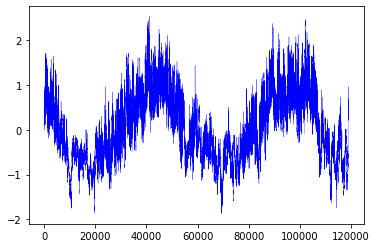

In [32]:
import matplotlib.pyplot as plt

# Set the params for the charts
lenPreds = len(preds)
predTemp = preds[0:lenPreds,:]
print(predTemp.shape)

# CHART Predicted 
UlimPred = lenPreds
#UlimPred = 10000
LlimPred = 0
SampleSizePred = UlimPred - LlimPred
plt.plot(range(SampleSizePred), predTemp[LlimPred:UlimPred], 'b', linewidth=0.27)

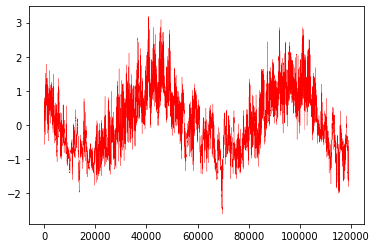

In [33]:
temp = float_data[:, 1] 
# Chart actual Test data 
# 420551 - 300k = 120551 samples
# 120551 - 119040 preds = 1511 ... this is the starting point of the predictions on the test scale 300k-420551

UlimReal = 420551
#UlimReal = 311511
LlimReal = 301511
SampleSizeReal = UlimReal - LlimReal
plt.plot(range(SampleSizeReal), temp[LlimReal:UlimReal], 'r', linewidth=0.27)

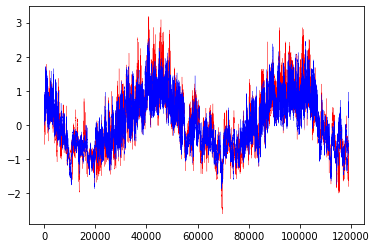

In [34]:
# Superimposed: model prediction (blue) vs reality (red)

# Chart Test
UlimReal = 420551
#UlimReal = 311511
LlimReal = 301511
SampleSizeReal = UlimReal - LlimReal
plt.plot(range(SampleSizeReal), temp[LlimReal:UlimReal], 'r', linewidth=0.27)

# Chart Predicted 
UlimPred = lenPreds
#UlimPred = 10000
LlimPred = 0
SampleSizePred = UlimPred - LlimPred
plt.plot(range(SampleSizePred), predTemp[LlimPred:UlimPred], 'b', linewidth=0.27)